In [1]:
from paths import *
from models import Generator
import torch
from utils import *
import matplotlib.pyplot as plt
import urllib
import numpy as np

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
g50 = Generator()
g100 = Generator()
g75 = Generator()
g50.load_state_dict(torch.load('during_training/generator_ep50.pkl'))
g100.load_state_dict(torch.load('during_training/generator_ep100.pkl'))
g75.load_state_dict(torch.load('during_training/generator_ep75.pkl'))
# print(g)
g50 = g50.to(device)
g100 = g100.to(device)
g75 = g75.to(device)


In [3]:
url = 'https://images.unsplash.com/photo-1606044466411-207a9a49711f?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1050&q=80'

In [20]:
def saliency_from_link(model,url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    img = cv2.resize(img, (256,192), interpolation = cv2.INTER_AREA)
    imgc = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    k = predict_plot(model,img,device)
    
    fig1 = plt.figure(figsize=(6,4.5))
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Original Image',fontsize=13)
    plt.imshow(imgc)
    
    fig2 = plt.figure(figsize=(6,4.5))
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Saliency Map',fontsize=13)
    plt.imshow(k.squeeze(0).numpy())
    

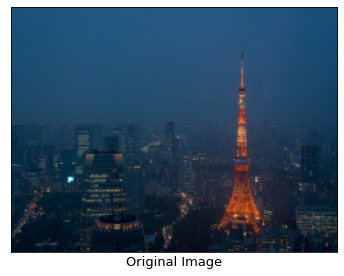

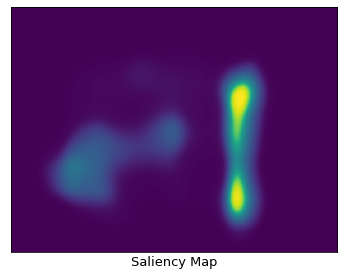

In [21]:
saliency_from_link(g50,url)

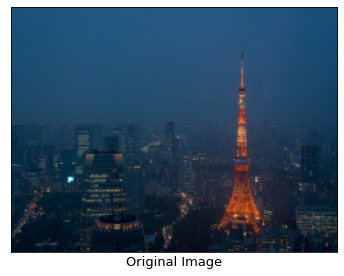

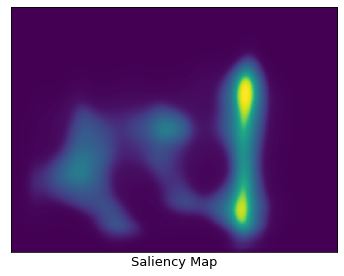

In [22]:
saliency_from_link(g100,url)

In [25]:
def saliency_from_val(model,name):
    img = cv2.imread(resizedImagesVal + name)
    imgc = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ground = cv2.imread(resizedMapsVal + name)
    smap = predict_plot(model, img, device).squeeze(0).numpy()
    
    fig = plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Original Image',fontsize=13)
    plt.imshow(imgc)
    
    plt.subplot(1,3,2)
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Ground Truth',fontsize=13)
    plt.imshow(ground)
    
    plt.subplot(1,3,3)
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Saliency Map',fontsize=13)
    plt.imshow(smap)

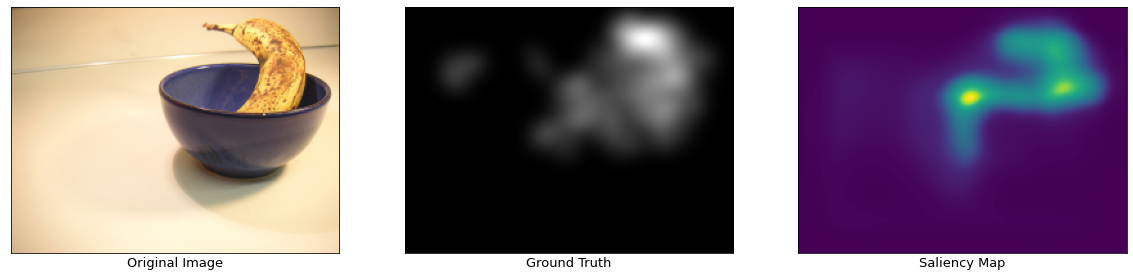

In [34]:
ex1 = 'COCO_val2014_000000003093.png'
saliency_from_val(g75,ex1)

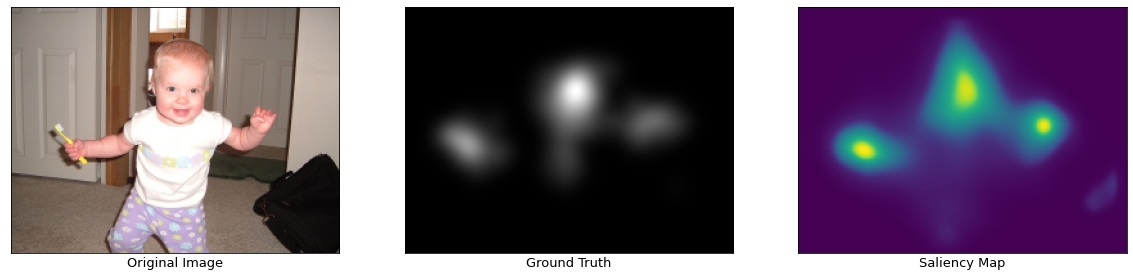

In [37]:
ex2 = 'COCO_val2014_000000011796.png'
saliency_from_val(g100,ex2)

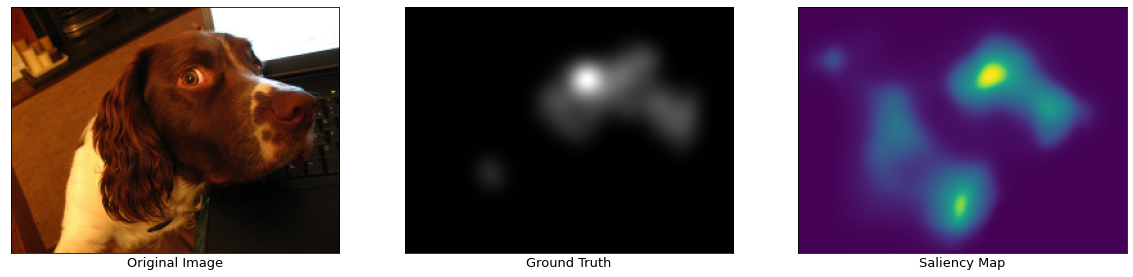

In [42]:
ex3 = 'COCO_val2014_000000043345.png'
saliency_from_val(g50,ex3)

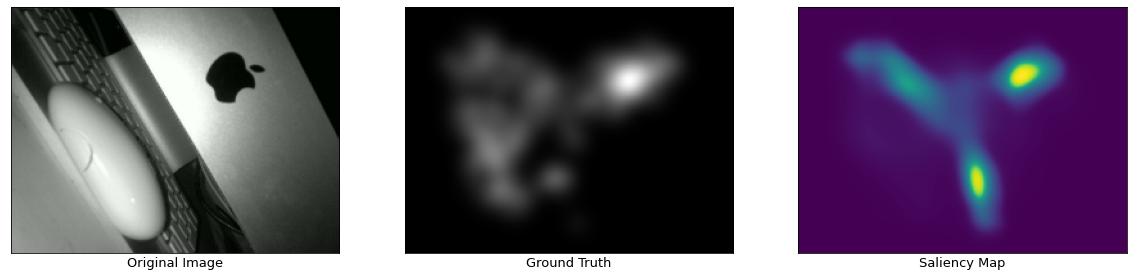

In [47]:
ex4 = 'COCO_val2014_000000068418.png'
saliency_from_val(g50,ex4)

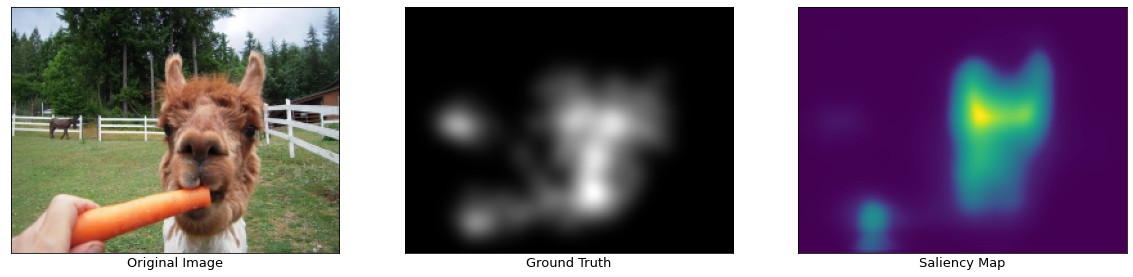

In [57]:
ex5 = 'COCO_val2014_000000113235.png'
saliency_from_val(g100,ex5)